## Setting up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
FOLDER_PATH = 'Colab Notebooks/Pedro-Londono_CW_Folder/'

MODELS_PATH = 'Colab Notebooks/Pedro-Londono_CW_Folder/Models'

GOOGLE_FOLDER_PATH = os.path.join('drive', 'My Drive', FOLDER_PATH)
GOOGLE_MODELS_PATH = os.path.join('drive', 'My Drive', MODELS_PATH)
 
print(os.listdir(GOOGLE_MODELS_PATH))
print(os.listdir(GOOGLE_FOLDER_PATH))


['SVM_Model.py', '__pycache__', 'HOG-SVM.ipynb', 'MLP.ipynb', 'SIFT-BoW-SVM.ipynb', 'HOG-BoW-SVM.ipynb', 'SVC_Alone.ipynb', 'HOG-MLP.ipynb', 'CNN.ipynb']
['Models', 'CW_Dataset', 'svc_alone.joblib', 'svc_hog.joblib', 'variables', 'assets', 'knn.joblib', 'svc_sift.joblib', 'cnn_arc1.h5', 'kmeans.joblib', 'mlp_arc1.h5', 'mlp_arc2.h5', 'cnn_arc2.h5', 'hog_mlp_arc1.h5', 'Personal_Dataset', 'test_function.ipynb']


## Reading the dataset

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import sys
CODE_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'Code')
sys.path.append(CODE_PATH)


In [ ]:
!pip install opencv-python==4.4.0.46


     |████████████████████████████████| 49.5MB 84kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30


In [ ]:
import cv2
from skimage import img_as_ubyte, io, color
import numpy as np
import matplotlib.pyplot as plt

DATASET_PATH = os.path.join(GOOGLE_FOLDER_PATH, 'CW_Dataset')

def load_images_from_folder(path, label_list=None):
  images = []
  labels = []
  img_labels = {}
  if label_list is None:
    folder_names = [folder for folder in sorted(os.listdir(path)) if not folder.startswith('README')]
    print('folder_names', folder_names)
  else:
    folder_names = [folder for folder in sorted(os.listdir(path)) if folder in label_list.endswith('.jpg')]  
  
  for folder in folder_names:
    file_names = [file for file in sorted(os.listdir(os.path.join(path, folder)))]
    print('file_names', file_names)
    for file in file_names:

      if file.endswith('.txt'):
        labels_rd = np.loadtxt(os.path.join(path, folder, file), delimiter=' ', usecols=(1)).tolist()

        [labels.append(label) for label in labels_rd]
        print(labels[:5], len(labels))
        
        print(folder, file, labels)
      else:
        rep_str = '(1)'
        if rep_str not in file:
          images.append(io.imread(os.path.join(path, folder, file)))
        print(folder, file)
  return images, labels



X, y = load_images_from_folder(DATASET_PATH)



Se han truncado las últimas 5000 líneas del flujo de salida.
train train_07288_aligned.jpg
train train_07289_aligned.jpg
train train_07290_aligned.jpg
train train_07291_aligned.jpg
train train_07292_aligned.jpg
train train_07293_aligned.jpg
train train_07294_aligned.jpg
train train_07295_aligned.jpg
train train_07296_aligned.jpg
train train_07297_aligned.jpg
train train_07298_aligned.jpg
train train_07299_aligned.jpg
train train_07300_aligned.jpg
train train_07301_aligned.jpg
train train_07302_aligned.jpg
train train_07303_aligned (1).jpg
train train_07303_aligned.jpg
train train_07304_aligned.jpg
train train_07305_aligned.jpg
train train_07306_aligned.jpg
train train_07307_aligned.jpg
train train_07308_aligned.jpg
train train_07309_aligned.jpg
train train_07310_aligned.jpg
train train_07311_aligned.jpg
train train_07312_aligned.jpg
train train_07313_aligned.jpg
train train_07314_aligned.jpg
train train_07315_aligned.jpg
train train_07316_aligned.jpg
train train_07317_aligned.jpg
train

## Introduction

The RAF dataset contains 15339 aligned facial color images containing expressions and labels for the images, the labels are encoded using ordinal encoding for every emotion. 

### Data
Images are named in the format of "train_XXXXX_aligned.jpg" / "test_XXXX_aligned.jpg".
Images are first roughly aligned using similarity transformation according to the two eye locations and the center of mouth.

Images are then resized to 100*100

#### Label explanation:
1. Surprise<p>
2. Fear<p>
3. Disgust<p>
4. Happiness<p>
5. Sadness
6. Anger
7. Neutral





## Data Preprocessing

Data was preprocessed by converting it to grayscale, at first using colors channels was used, however it was taking to long to train some models such as the SVM model. Using colors the main problem was the curse of dimentionality, even trying to use much less columns. Based on the dataset using color would not give much insight, as to recornise emotions, color probably has less importance. Thus, converting to grayscale reduced the training time. 




(15339, 100, 100, 3) (15339,)


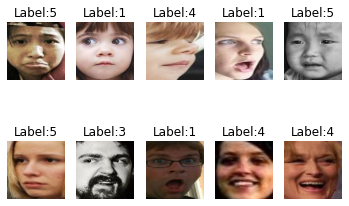

In [ ]:

def convert_to_numpy(images, labels):
  """Converts the images to a numpy array""" 
  
  data = np.asarray(images)
  lb = np.asarray(labels)
  return data, lb

X, y = convert_to_numpy(X, y)


X = X / 255.
X = X.astype(np.float32)
y = y.astype(np.int32)

print(X.shape, y.shape)


#def print_images()
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True)
ax = axs.ravel()
for i in range(10):
  ax[i].imshow(X[i, :, :, :])
  ax[i].set_title(f'Label:{y[i]}')
  ax[i].set_axis_off()
plt.show()



In [ ]:
X = img_as_ubyte(color.rgb2gray(X))


In [ ]:
print(X.dtype, y.dtype)
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_index, test_index in skf.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


uint8 int32
TRAIN: [ 2191  2206  2217 ... 15336 15337 15338] TEST: [   0    1    2 ... 3484 3511 3514]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 2191  2206  2217 ... 13414 13415 13416]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 5171  5172  5173 ... 14055 14056 14057]
TRAIN: [    0     1     2 ... 15336 15337 15338] TEST: [ 6762  6763  6767 ... 14696 14697 14698]
TRAIN: [    0     1     2 ... 14696 14697 14698] TEST: [ 9498  9499  9500 ... 15336 15337 15338]


In [ ]:
import tensorflow as tf
import keras
from keras.wrappers.scikit_learn import KerasClassifier
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense, Conv2D, MaxPooling2D, Conv1D
from keras.models import Sequential
from keras.layers import Flatten, Activation
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from keras.constraints import maxnorm
from keras.optimizers import SGD, Nadam, Adam, RMSprop, Adagrad, Adadelta, Adamax
from keras.optimizers import RMSprop
from keras import datasets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import expon
from sklearn.utils.fixes import loguniform
from scipy.stats import randint, loguniform, poisson, boltzmann
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from keras.utils.np_utils import to_categorical
classes = np.unique(y_train) 
classes


array([1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [ ]:
y_train = to_categorical(y_train, num_classes=8)
#Y_test = to_categorical(y_test, num_classes=8)

print(y_train.shape)

(12272, 8)


In [ ]:
#X.hape
X_train = np.expand_dims(X_train, -1)


### Arquitecture 1

In [ ]:
from keras.utils.np_utils import to_categorical
#y_train = to_categorical(y_train, num_classes=8)
input_shape = (100, 100, 1)
#y_train = to_categorical(y_train)
#print(y_train.shape)
#X_train = np.expand_dims(X_train, -1)
metrics = [tf.keras.metrics.Accuracy(), tf.keras.metrics.CategoricalAccuracy() ,tf.keras.metrics.AUC(3), tf.keras.metrics.Precision()]
#y_test = to_categorical(y_test)

model = Sequential()
model.add(keras.Input(input_shape))
print(X_train.shape)
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='elu', kernel_initializer='glorot_normal'))
model.add(Dense(80, activation='sigmoid'))
model.add(Dense(20, activation='softplus', kernel_initializer='glorot_normal'))
model.add(Dense(8, activation='softmax'))

 
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.0003), metrics=metrics)
#learning_rate=0.001 

model.fit(X_train, y_train, epochs=200, batch_size=100)

model.summary()


(12272, 100, 100, 1)
Epoch 1/200
123/123 [==============================] - 173s 1s/step - loss: 1.8195 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3448 - auc: 0.5016 - precision: 0.2006
Epoch 2/200
123/123 [==============================] - 170s 1s/step - loss: 1.6570 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3882 - auc: 0.5023 - precision: 0.4533
Epoch 3/200
123/123 [==============================] - 171s 1s/step - loss: 1.6366 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3898 - auc: 0.5003 - precision: 0.5463
Epoch 4/200
123/123 [==============================] - 171s 1s/step - loss: 1.6244 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3873 - auc: 0.5233 - precision: 0.5761
Epoch 5/200
123/123 [==============================] - 170s 1s/step - loss: 1.5715 - accuracy: 0.0000e+00 - categorical_accuracy: 0.4114 - auc: 0.5623 - precision: 0.6693
Epoch 6/200
123/123 [==============================] - 170s 1s/step - loss: 1.5038 - accuracy: 0.0000e+00 - categorical_accu

In [ ]:
model.save(GOOGLE_FOLDER_PATH + 'cnn_arc1.h5')

In [ ]:
X_test = np.expand_dims(X_test, -1)
X_test.shape

(3067, 100, 100, 1)

In [ ]:
y_test = to_categorical(y_test, num_classes=8)
print(y_test.shape)


(3067, 8)


In [ ]:

y_pred = model.predict(X_test)
y_pred[0, :]

array([5.7821921e-09, 8.6591073e-04, 3.7918267e-07, 1.4449803e-07,
       2.6585344e-02, 9.4653898e-01, 5.8515843e-07, 2.6008571e-02],
      dtype=float32)

In [ ]:
y_test = [np.argmax(y) for y in y_test[:, :]]

y_pred = [np.argmax(y_p) for y_p in y_pred[:, :]]

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

precision_score = precision_score(y_test, y_pred, average='weighted')
accuracy_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='weighted')
recall_score = recall_score(y_test, y_pred, average='weighted')
print(f'precision score: {precision_score}')
print(f'accuracy score: {accuracy_score}')
print(f'f1 score: {f1_score}')
print(f'recall score: {recall_score}')

precision score: 0.6882065316709722
accuracy score: 0.6866644929898924
f1 score: 0.6871607475245316
recall score: 0.6866644929898924


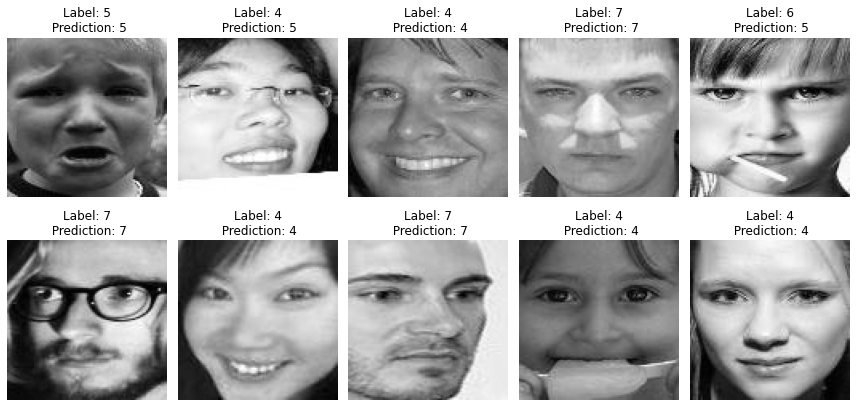

In [ ]:
from sklearn.utils import shuffle
X_test, y_test, y_pred = shuffle(X_test,  y_test, y_pred)
X_test_img = X_test.reshape(-1, 100, 100)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(X_test_img[i, :, :], cmap='gray')
    ax[i].set_title(f'Label: {y_test[i]}\n Prediction: {y_pred[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

[[234   9   4  21  15   7  33]
 [ 15  28   1   6  12   8   1]
 [  6   1  63  32  31  15  27]
 [ 18  11  34 995  47   9  78]
 [ 17   4  31  56 293  10  81]
 [ 12   3  17  13  14 100  15]
 [ 29   6  48  73  86   5 393]]


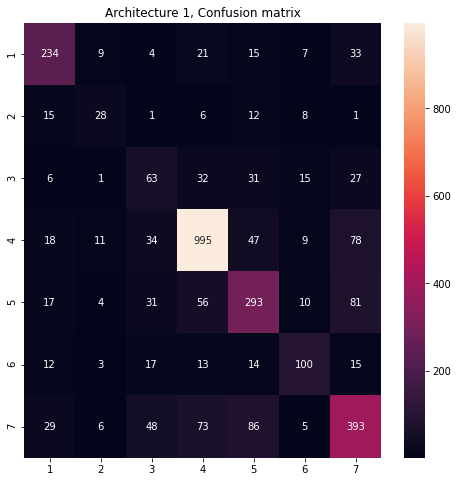

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in "1234567"],
                  columns = [i for i in "1234567"])

fig, ax = plt.subplots(figsize=(8, 8))

plt.title(f'Architecture 1, Confusion matrix')

sns.heatmap(df_cm, annot=True, fmt='d')
plt.show()

### Architecture 2

In [ ]:
input_shape = (100, 100, 1)
#y_train = to_categorical(y_train)
#print(y_train.shape)
#X_train = np.expand_dims(X_train, -1)
metrics = [tf.keras.metrics.Accuracy(), tf.keras.metrics.CategoricalAccuracy() ,tf.keras.metrics.AUC(3), tf.keras.metrics.Precision()]
#y_test = to_categorical(y_test)
model = Sequential()
model.add(keras.Input(input_shape))
print(X_train.shape)
model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(40, activation='softplus'))
model.add(Dense(60, activation='relu'))
model.add(Dense(80, activation='selu',))
model.add(Dense(100, activation='elu', kernel_initializer='glorot_normal'))
model.add(Dense(80, activation='sigmoid'))
model.add(Dense(20, activation='softplus', kernel_initializer='glorot_normal'))
#model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

 
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.0003), metrics=metrics)
#learning_rate=0.001 

model.fit(X_train, y_train, epochs=100, batch_size=100)

model.summary()

(12272, 100, 100, 1)
Epoch 1/100
123/123 [==============================] - 281s 2s/step - loss: 1.8576 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3693 - auc: 0.5000 - precision: 0.0000e+00
Epoch 2/100
123/123 [==============================] - 279s 2s/step - loss: 1.6559 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3847 - auc: 0.5000 - precision: 0.2236
Epoch 3/100
123/123 [==============================] - 280s 2s/step - loss: 1.6257 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3889 - auc: 0.5218 - precision: 0.5501
Epoch 4/100
123/123 [==============================] - 281s 2s/step - loss: 1.5991 - accuracy: 0.0000e+00 - categorical_accuracy: 0.4064 - auc: 0.5552 - precision: 0.6299
Epoch 5/100
123/123 [==============================] - 281s 2s/step - loss: 1.5421 - accuracy: 0.0000e+00 - categorical_accuracy: 0.4323 - auc: 0.5868 - precision: 0.6429
Epoch 6/100
123/123 [==============================] - 280s 2s/step - loss: 1.4819 - accuracy: 0.0000e+00 - categorical_

In [ ]:
from joblib import dump, load
#model.save()
model.save(GOOGLE_FOLDER_PATH + 'cnn_arc2.h5')



In [ ]:
X_test = np.expand_dims(X_test, -1)
X_test.shape

(3067, 100, 100, 1)

In [ ]:
y_test = to_categorical(y_test, num_classes=8)
print(y_test.shape)

(3067, 8)


In [ ]:
y_pred = model.predict(X_test)
y_pred[0, :]

array([2.5797062e-06, 9.1962361e-01, 6.9539406e-04, 6.4670469e-04,
       5.4562278e-03, 5.4786488e-04, 1.3526527e-03, 7.1674921e-02],
      dtype=float32)

In [ ]:
y_test = [np.argmax(y) for y in y_test[:, :]]

y_pred = [np.argmax(y_p) for y_p in y_pred[:, :]]

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

precision_score = precision_score(y_test, y_pred, average='weighted')
accuracy_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='weighted')
recall_score = recall_score(y_test, y_pred, average='weighted')
print(f'precision score: {precision_score}')
print(f'accuracy score: {accuracy_score}')
print(f'f1 score: {f1_score}')
print(f'recall score: {recall_score}')

precision score: 0.6975075143742537
accuracy score: 0.6922073687642648
f1 score: 0.6933018994479957
recall score: 0.6922073687642648


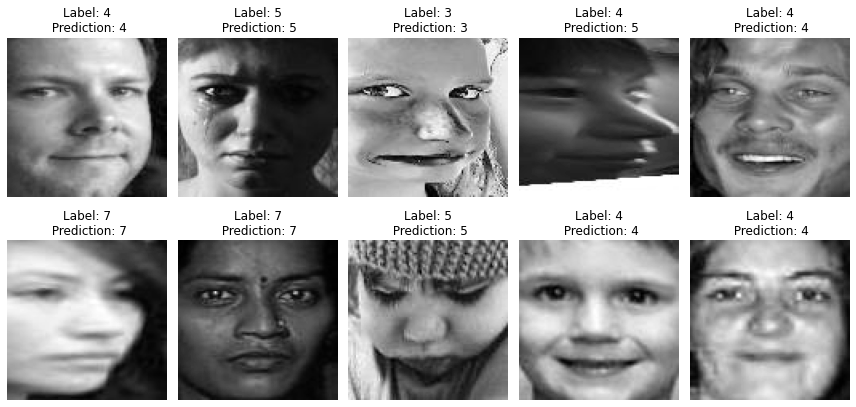

In [ ]:
from sklearn.utils import shuffle
X_test, y_test, y_pred = shuffle(X_test,  y_test, y_pred)
X_test_img = X_test.reshape(-1, 100, 100)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(X_test_img[i, :, :], cmap='gray')
    ax[i].set_title(f'Label: {y_test[i]}\n Prediction: {y_pred[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

[[247   6   6   7  16   7  34]
 [ 16  26   0   8  10   9   2]
 [  9   1  53  24  30  19  39]
 [ 18  12  26 951  81  15  89]
 [ 16   7  25  28 311   9  96]
 [ 14   3  12  12  12 112   9]
 [ 40   4  23  60  82   8 423]]


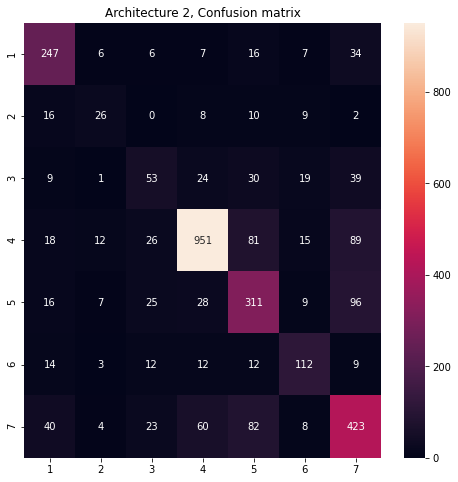

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in "1234567"],
                  columns = [i for i in "1234567"])

fig, ax = plt.subplots(figsize=(8, 8))

plt.title(f'Architecture 2, Confusion matrix')

sns.heatmap(df_cm, annot=True, fmt='d')
plt.show()

### Other Architectures

In [ ]:
input_shape = (100, 100, 1)

metrics = [tf.keras.metrics.Accuracy(), tf.keras.metrics.CategoricalAccuracy() ,tf.keras.metrics.AUC(3), tf.keras.metrics.Precision()]
#y_test = to_categorical(y_test)
model = Sequential()
model.add(keras.Input(input_shape))
print(X_train.shape)
model.add(Conv2D(16, (10, 10),strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(32, (5, 5),strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (5, 5),strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(40, activation='softplus'))
model.add(Dense(60, activation='relu'))
model.add(Dense(80, activation='selu',))
model.add(Dense(100, activation='elu', kernel_initializer='glorot_normal'))
model.add(Dense(80, activation='sigmoid'))
model.add(Dense(20, activation='softplus', kernel_initializer='glorot_normal'))
#model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

 
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.0003), metrics=metrics)
#learning_rate=0.001 

model.fit(X_train, y_train, epochs=65, batch_size=100)

model.summary()

(12272, 100, 100, 1)
Epoch 1/65
123/123 [==============================] - 452s 4s/step - loss: 1.8978 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3615 - auc: 0.5000 - precision: 0.0000e+00
Epoch 2/65
123/123 [==============================] - 451s 4s/step - loss: 1.6509 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3883 - auc: 0.5000 - precision: 0.0000e+00
Epoch 3/65
123/123 [==============================] - 449s 4s/step - loss: 1.6485 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3849 - auc: 0.5000 - precision: 0.0000e+00
Epoch 4/65
123/123 [==============================] - 447s 4s/step - loss: 1.6271 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3923 - auc: 0.5001 - precision: 0.1161
Epoch 5/65
123/123 [==============================] - 449s 4s/step - loss: 1.6160 - accuracy: 0.0000e+00 - categorical_accuracy: 0.4028 - auc: 0.5072 - precision: 0.5326
Epoch 6/65
123/123 [==============================] - 450s 4s/step - loss: 1.5909 - accuracy: 0.0000e+00 - categorica

In [ ]:
input_shape = (100, 100, 1)

metrics = [tf.keras.metrics.Accuracy(), tf.keras.metrics.CategoricalAccuracy() ,tf.keras.metrics.AUC(3), tf.keras.metrics.Precision()]
#y_test = to_categorical(y_test)
model = Sequential()
model.add(keras.Input(input_shape))
print(X_train.shape)
model.add(Conv2D(16, (5, 5),strides=(1,1), padding='same'))
model.add(Activation('softplus'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(32, (5, 5),strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(32, (5, 5),strides=(1,1), padding='same'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3),strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(100, activation='relu', kernel_initializer='glorot_normal'))

model.add(Dense(8, activation='softmax'))

 
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.0003), metrics=metrics)

model.fit(X_train, y_train, epochs=50, batch_size=100)

model.summary()

(12272, 100, 100, 1)
Epoch 1/65
123/123 [==============================] - 452s 4s/step - loss: 1.8011 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3457 - auc: 0.5062 - precision: 0.2789
Epoch 2/65
123/123 [==============================] - 448s 4s/step - loss: 1.6462 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3934 - auc: 0.5000 - precision: 0.0000e+00
Epoch 3/65
123/123 [==============================] - 448s 4s/step - loss: 1.6300 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3878 - auc: 0.5004 - precision: 0.1672
Epoch 4/65
123/123 [==============================] - 449s 4s/step - loss: 1.6198 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3906 - auc: 0.5105 - precision: 0.6027
Epoch 5/65
123/123 [==============================] - 450s 4s/step - loss: 1.5168 - accuracy: 0.0000e+00 - categorical_accuracy: 0.4421 - auc: 0.5779 - precision: 0.7047
Epoch 6/65
123/123 [==============================] - 449s 4s/step - loss: 1.3569 - accuracy: 0.0000e+00 - categorical_accura

In [ ]:
input_shape = (100, 100, 1)

metrics = [tf.keras.metrics.Accuracy(), tf.keras.metrics.CategoricalAccuracy() ,tf.keras.metrics.AUC(3), tf.keras.metrics.Precision()]

model = Sequential()
model.add(Conv2D(input_shape=input_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten(name='flatten'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.003), metrics=metrics)


model.fit(X_train, y_train, epochs=10, batch_size=100)

model.summary()

Epoch 1/10
123/123 [==============================] - 4807s 39s/step - loss: 1.7408 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3688 - auc: 0.5175 - precision: 0.4054
Epoch 2/10
123/123 [==============================] - 4763s 39s/step - loss: 1.6428 - accuracy: 0.0000e+00 - categorical_accuracy: 0.3953 - auc: 0.5364 - precision: 0.5315
Epoch 3/10
123/123 [==============================] - 4782s 39s/step - loss: 1.5282 - accuracy: 0.0000e+00 - categorical_accuracy: 0.4502 - auc: 0.5825 - precision: 0.6906
Epoch 4/10
123/123 [==============================] - 4735s 38s/step - loss: 1.2895 - accuracy: 0.0000e+00 - categorical_accuracy: 0.5385 - auc: 0.6537 - precision: 0.7436
Epoch 5/10
 45/123 [=========>....................] - ETA: 50:34 - loss: 1.2057 - accuracy: 0.0000e+00 - categorical_accuracy: 0.5728 - auc: 0.6692 - precision: 0.7435

In [ ]:
from joblib import dump, load
#model.save()

model.save(GOOGLE_FOLDER_PATH + 'cnn_vgg16.h5')


In [ ]:
X_test = np.expand_dims(X_test, -1)
X_test.shape

(3067, 100, 100, 1)

In [ ]:
y_test = to_categorical(y_test, num_classes=8)
print(y_test.shape)

(3067, 8)


In [ ]:
y_pred = model.predict(X_test)
y_pred[0, :]

array([1.9657248e-06, 4.2228908e-03, 1.2726398e-02, 2.3002033e-03,
       9.2801062e-04, 9.7909933e-01, 1.4938638e-04, 5.7192740e-04],
      dtype=float32)

In [ ]:
y_test = [np.argmax(y) for y in y_test[:, :]]

y_pred = [np.argmax(y_p) for y_p in y_pred[:, :]]

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

precision_score = precision_score(y_test, y_pred, average='weighted')
accuracy_score = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred, average='weighted')
recall_score = recall_score(y_test, y_pred, average='weighted')
print(f'precision score: {precision_score}')
print(f'accuracy score: {accuracy_score}')
print(f'f1 score: {f1_score}')
print(f'recall score: {recall_score}')

precision score: 0.6939110166250001
accuracy score: 0.6830779263123573
f1 score: 0.685966643397317
recall score: 0.6830779263123573


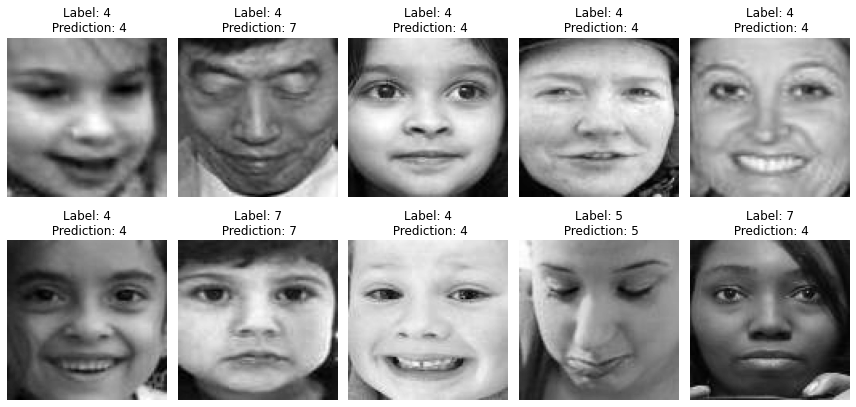

In [ ]:
from sklearn.utils import shuffle
X_test, y_test, y_pred = shuffle(X_test,  y_test, y_pred)
X_test_img = X_test.reshape(-1, 100, 100)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(10):
    ax[i].imshow(X_test_img[i, :, :], cmap='gray')
    ax[i].set_title(f'Label: {y_test[i]}\n Prediction: {y_pred[i]}')
    ax[i].set_axis_off()
fig.tight_layout()
plt.show()

[[205   7   6  18  25   7  55]
 [ 13  23   3   9   9   8   6]
 [  4   0  70  18  26  19  38]
 [ 13   4  32 968  77  13  85]
 [  6   0  33  37 305   4 107]
 [  7   7  22  21  13  93  11]
 [ 30   1  26  45  98   9 431]]


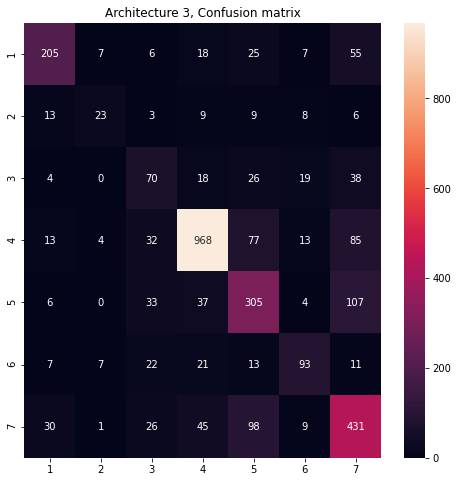

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
cm = confusion_matrix(y_test, y_pred)
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in "1234567"],
                  columns = [i for i in "1234567"])

fig, ax = plt.subplots(figsize=(8, 8))

plt.title(f'Architecture 1, Confusion matrix')

sns.heatmap(df_cm, annot=True, fmt='d')
plt.show()